# 🎬 Análise Exploratória de Dados de Filmes - MovieLens 100K

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

## 📥 Carregando os Dados

In [3]:
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', names=['movie_id', 'title'] + ['col' + str(i) for i in range(22)], usecols=[0, 1])

## 🔗 Juntando os Dados

In [4]:
df = pd.merge(ratings, movies, on='movie_id')
df.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


## 📊 Estatísticas Básicas

In [5]:
df['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

## 🎞️ Filmes mais avaliados

In [6]:
df['title'].value_counts().head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64

## ⭐ Filmes com melhores médias de avaliação

In [7]:
mean_ratings = df.groupby('title')['rating'].mean()
mean_ratings.sort_values(ascending=False).head(10)

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
Star Kid (1997)                                      5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Someone Else's America (1995)                        5.0
Name: rating, dtype: float64

## 📈 Distribuição da nota das avaliações

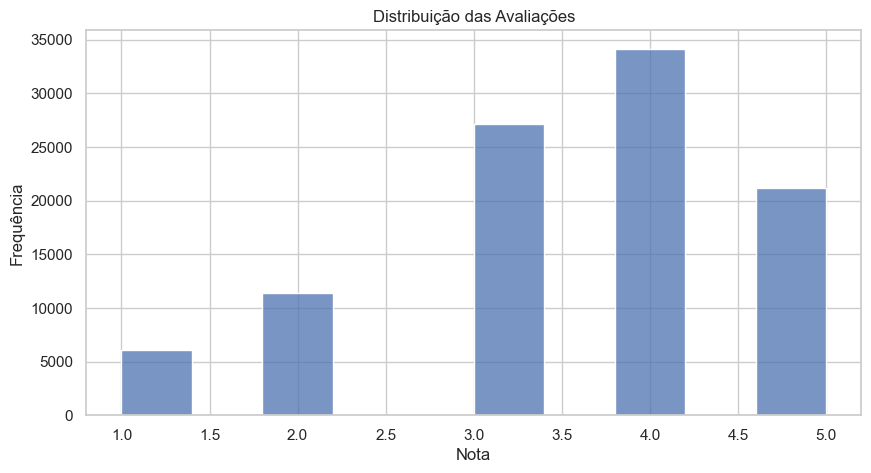

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=10)
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

## 👤 Top 10 usuários que mais avaliaram

<Axes: title={'center': 'Top 10 usuários que mais avaliaram'}, xlabel='user_id'>

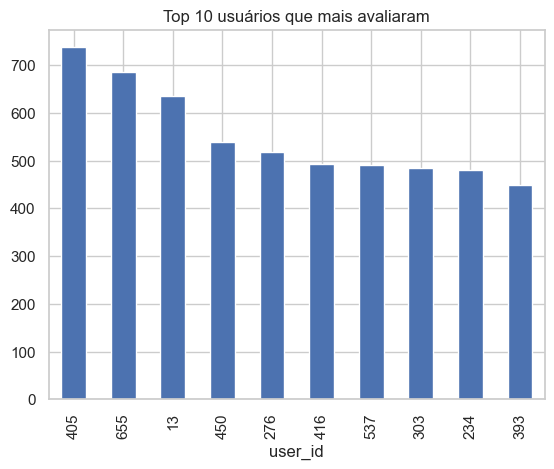

In [9]:
avaliacoes_por_usuario = df['user_id'].value_counts().head(10)
avaliacoes_por_usuario.plot(kind='bar', title='Top 10 usuários que mais avaliaram')

## 🏆 Melhores filmes com pelo menos 100 avaliações

In [10]:
contagem = df.groupby('title')['rating'].count()
media = df.groupby('title')['rating'].mean()
filtro = contagem[contagem >= 100].index
melhores_filmes = media[filtro].sort_values(ascending=False)
melhores_filmes.head(10)

title
Close Shave, A (1995)               4.491071
Schindler's List (1993)             4.466443
Wrong Trousers, The (1993)          4.466102
Casablanca (1942)                   4.456790
Shawshank Redemption, The (1994)    4.445230
Rear Window (1954)                  4.387560
Usual Suspects, The (1995)          4.385768
Star Wars (1977)                    4.358491
12 Angry Men (1957)                 4.344000
Citizen Kane (1941)                 4.292929
Name: rating, dtype: float64

## 🧨 Piores filmes com muitas avaliações

In [11]:
piores_filmes = media[filtro].sort_values().head(10)
piores_filmes

title
Cable Guy, The (1996)          2.339623
Jungle2Jungle (1997)           2.439394
Crash (1996)                   2.546875
Event Horizon (1997)           2.574803
Spawn (1997)                   2.615385
Batman Forever (1995)          2.666667
Batman Returns (1992)          2.683099
George of the Jungle (1997)    2.685185
Down Periscope (1996)          2.702970
Mimic (1997)                   2.742574
Name: rating, dtype: float64

## 🧮 Distribuição de notas com CountPlot

Text(0.5, 1.0, 'Distribuição de notas')

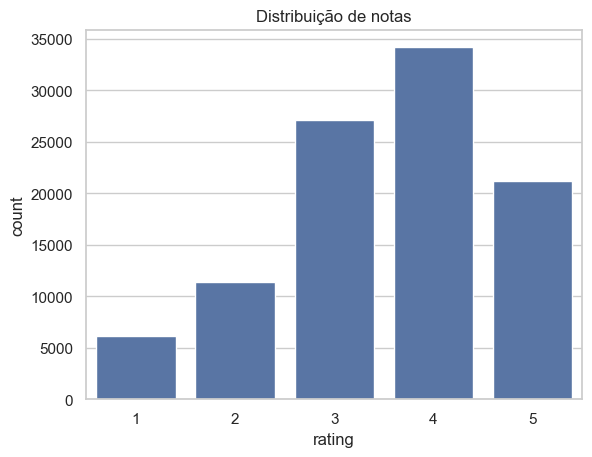

In [12]:
sns.countplot(data=df, x='rating')
plt.title('Distribuição de notas')

## 🔥 Correlação entre notas de filmes (heatmap simplificado)

Text(0.5, 1.0, 'Correlação entre notas de filmes')

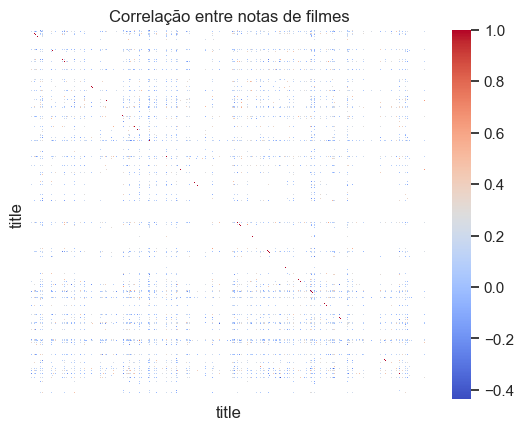

In [13]:
pivot = df.pivot_table(index='user_id', columns='title', values='rating')
correlacao = pivot.corr(min_periods=50)
sns.heatmap(correlacao, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Correlação entre notas de filmes')

## ⚖️ Filmes mais polarizados (maior variância nas notas)

In [14]:
variancia = df.groupby('title')['rating'].var()
mais_polarizados = variancia.sort_values(ascending=False).head(10)
mais_polarizados

title
Delta of Venus (1994)                    8.000000
Tough and Deadly (1995)                  8.000000
The Deadly Cure (1996)                   8.000000
Hugo Pool (1997)                         4.571429
Convent, The (Convento, O) (1995)        4.500000
Love and Death on Long Island (1997)     4.500000
American Dream (1990)                    4.500000
Little City (1998)                       4.500000
Rough Magic (1995)                       4.500000
Visitors, The (Visiteurs, Les) (1993)    4.500000
Name: rating, dtype: float64

## 📉 Relação entre média e número de avaliações

Text(0.5, 1.0, 'Relação entre média e número de avaliações')

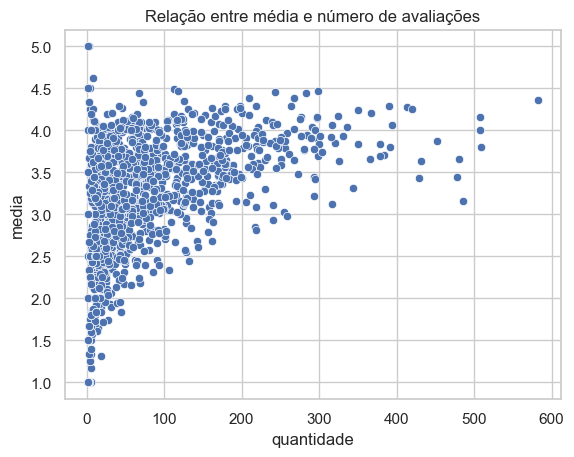

In [15]:
df_agg = df.groupby('title').agg({'rating': ['mean', 'count']})
df_agg.columns = ['media', 'quantidade']
sns.scatterplot(data=df_agg, x='quantidade', y='media')
plt.title('Relação entre média e número de avaliações')